In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import csv
from collections import Counter
import statsmodels.api as sm 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Summary

The main question this notebook tries to answer is this: <br>
<b>Why does a donor only donates once in his donor lifetime cycle to Leuven Univeristy Fund (LUF)? Are there similarities in this type of donations (e.g. is the gift linked to a specific event)? </b> <br>

Note that there are 3 types of credits that can be donated by donors to the Leuven Univerity Fund (LUF), namely <b>Funds</b>, <b>Chairs</b>, & <b>Other Credits</b>. <br>

In order to answer this question, we try try to analyse the number of donations LUF received over time. <br>
Here, we plot line graphs containing two lines: One representing donors who have only donated once <b>(Uni-donors)</b> and the other one represents the <i><b>firs</b>t</i> donation of donors who went on to donate again to the LUF <b>(Multi-donors)</b>. <br>

From the line graphs, we should be able to get some interesting ideas about why some donors only donate once to the LUF.

In [3]:
main_data = pd.read_csv('sqldata/question2.csv',dtype = str)
#Normalize the sum: If two person payed 1000 Euro, then each person's normalized sum is 500 Euro
df = pd.DataFrame.from_dict(Counter((main_data['ORDER_GUID'])), orient='index').reset_index()
df = df.rename(columns={'index':'ORDER_GUID', 0:'ORDER_GUID_COUNT'})
main_data = pd.merge(main_data,df,on='ORDER_GUID',how='inner')
main_data['ZZAMNT_PAYED'] = main_data['ZZAMNT_PAYED'].astype('float64')
main_data['ORDER_GUID_COUNT'] = main_data['ORDER_GUID_COUNT'].astype('int32')
print(main_data['ZZAMNT_PAYED'].sum())
main_data['ZZAMNT_PAYED_NORM'] = main_data['ZZAMNT_PAYED']/main_data['ORDER_GUID_COUNT']
print(main_data['ZZAMNT_PAYED_NORM'].sum().round(2))
print(main_data.shape)
main_data.head()

138438337.52
130563906.13
(130934, 34)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,ZZGESTRUCT_MED,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.00
1,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00
2,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,dienst Alumni,NaN,03,2007,2007,NaN,1,3000.00
3,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,1303.94
4,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00


In [4]:
#Check for inconsistency among the data. One inconsistency could be if the donation sum is less than 0
main_data['ZZAMNT_PAYED'] = main_data['ZZAMNT_PAYED'].astype('float64')
main_data[main_data['ZZAMNT_PAYED'] < 0]

,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,ZZGESTRUCT_MED,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM
126029,0201222693,1,0,NaN,N,BE,NaN,X,NaN,X,...,400001501822,00001,Fonds Digestieve Oncologie,02,01,2017,2017,KLINISCHE DIGESTIEVE ONCOLOGIE,2,-337.5
126030,0201222694,1,0,NaN,NaN,NaN,NaN,X,X,NaN,...,400001501822,00001,Fonds Digestieve Oncologie,02,01,2017,2017,KLINISCHE DIGESTIEVE ONCOLOGIE,2,-337.5


As you can see there are two entries where donation amount is -675 Euro. This is also a joint donation. This data needs to be removed.

In [5]:
main_data = main_data[main_data['ZZAMNT_PAYED'] >= 0]
main_data.reset_index(drop=True,inplace=True)
print(main_data.shape)
main_data.head()

(130932, 34)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,ZZGESTRUCT_MED,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.00
1,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00
2,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,dienst Alumni,NaN,03,2007,2007,NaN,1,3000.00
3,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,1303.94
4,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00


In [6]:
#Calculate all the statistics: Actually just the Total Count is needed for this exercise
order_subset = main_data[['PARTNER','ZZAMNT_PAYED_NORM']]
aggregate = pd.DataFrame(group.describe().rename(columns={'ZZAMNT_PAYED_NORM':name}).squeeze()
                         for name, group in order_subset.groupby('PARTNER'))
aggregate['PARTNER'] = aggregate.index
aggregate = aggregate.reset_index(drop=True)
aggregate = aggregate.rename(columns={'count':'DONATION_COUNT',
                                      'mean':'DONATION_MEAN',
                                      'std':'DONATION_STD',
                                      'min':'DONATION_MIN',
                                      '25%':'DONATION_25',
                                      '50%':'DONATION_50',
                                      '75%':'DONATION_75',
                                      'max':'DONATION_MAX'})
                                      
front = aggregate['PARTNER']
aggregate.drop(labels=['PARTNER'], axis=1,inplace = True)
aggregate.insert(0, 'PARTNER', front)
print(aggregate.shape)
aggregate.head()

(56897, 9)


,PARTNER,DONATION_COUNT,DONATION_MEAN,DONATION_STD,DONATION_MIN,DONATION_25,DONATION_50,DONATION_75,DONATION_MAX
0,0200000002,7.0,2186.277143,735.028946,1000.0,1901.970,2500.0,2500.0,3000.00
1,0200000007,13.0,14058.253077,20169.415559,1250.0,4399.100,5750.0,11500.0,63563.29
2,0200000010,8.0,575.000000,265.921578,100.0,500.000,500.0,725.0,1000.00
3,0200000013,19.0,12567.816842,10158.236431,1000.0,3907.125,9110.0,24317.5,32000.00
4,0200000024,1.0,20000.000000,NaN,20000.0,20000.000,20000.0,20000.0,20000.00


<b>DONATION_COUNT</b> is used to classify between Uni-donors (DONATION_COUNT == 1) and Multi-donors (DONATION_COUNT > 1)

In [7]:
aggregate = aggregate[['PARTNER','DONATION_COUNT']]
main_data = pd.merge(main_data, aggregate, on='PARTNER', how='inner')
print(main_data.shape)
main_data.head()

(130932, 35)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM,DONATION_COUNT
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.00,7.0
1,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00,7.0
2,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2007,2007,NaN,1,3000.00,7.0
3,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,1303.94,7.0
4,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00,7.0


In [8]:
#Sort Values according to PARTNER & DOCUMENT DATE. Reset the index
main_data.sort_values(['PARTNER', 'ZLUF_DOCDATE'], ascending=[1,1])
main_data.reset_index(drop=True, inplace=True)
print(main_data.shape)
main_data.head()

(130932, 35)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM,DONATION_COUNT
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.00,7.0
1,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00,7.0
2,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2007,2007,NaN,1,3000.00,7.0
3,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,1303.94,7.0
4,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Faculteit Rechtsgeleerdheid,NaN,03,2014,2014,NaN,1,2500.00,7.0


We are only interested in the first donation of Multi-donors for this exercise. That's why we sort the donations for each Multi-donors according to their donation date (ZLUF_DOCDATE).

In [9]:
#Only select the entry with first donation
main_data_for_gift = main_data  #For later to do time series plot for gifts
main_data = main_data.sort_values(['PARTNER', 'ZLUF_DOCDATE'], ascending=[1,1]).groupby('PARTNER').head(1)
main_data.reset_index(drop=True, inplace=True)
print(main_data.shape)
main_data.head()

(56897, 35)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,CREDIT_CATEGORY,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM,DONATION_COUNT
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.0,7.0
1,0200000007,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,dep. Farmaceutische Wetenschappen,NaN,03,2010,2010,NaN,1,4000.0,13.0
2,0200000010,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00001,Science@Leuven Fund,NaN,03,2009,2009,NaN,1,100.0,8.0
3,0200000013,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00003,Fac. Economie en Bedrijfswetenschappen,NaN,03,2012,2012,NaN,1,5000.0,19.0
4,0200000024,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00001,KU Leuven Erfgoedfonds,01,02,2018,2018,DIENST ALUMNI,1,20000.0,1.0


In [10]:
#TARGET CLASS
main_data['IS_MULTI_DONOR'] = (main_data['DONATION_COUNT'] > 1).astype(int)
print(main_data.shape)
main_data.head()

(56897, 36)


,PARTNER,TYPE,ZZGEBOORTEJAAR,BIRTHPL,BU_LANGU,CNT_ORIGIN,NATIONALITY,ZZGEEN_VOORNAAM,XSEXF,XSEXM,...,CREDIT_DESCRIPTION,FISCAAL_ATTEST,DANKBRIEF,FISCJAAR,GJAHR,ORGEENHEID,ORDER_GUID_COUNT,ZZAMNT_PAYED_NORM,DONATION_COUNT,IS_MULTI_DONOR
0,0200000002,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,dienst Alumni,NaN,03,2004,2004,NaN,1,1000.0,7.0,1
1,0200000007,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,dep. Farmaceutische Wetenschappen,NaN,03,2010,2010,NaN,1,4000.0,13.0,1
2,0200000010,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Science@Leuven Fund,NaN,03,2009,2009,NaN,1,100.0,8.0,1
3,0200000013,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Fac. Economie en Bedrijfswetenschappen,NaN,03,2012,2012,NaN,1,5000.0,19.0,1
4,0200000024,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,KU Leuven Erfgoedfonds,01,02,2018,2018,DIENST ALUMNI,1,20000.0,1.0,0


In the below cell, we create additional features such as Year of donation, Month of donation, and normalized Month of donation. <br>
Normalized month (ZLUF_DOCDATE_M_N) of donation means the value is 1 for Jan 2002, 2 for Feb 2002, .. 12 for Dec 2002, 13 for Jan 2003,.. and so on. <br> 
This normalized month can be very helpful when creating time series plot.

In [11]:
time_line_data = main_data[['PARTNER','TYPE','ZLUF_DOCDATE','ZZAMNT_PAYED_NORM','IS_MULTI_DONOR']]
time_line_data['ZLUF_DOCDATE'] = pd.to_datetime(time_line_data['ZLUF_DOCDATE'])
time_line_data['ZLUF_DOCDATE_Y'] = time_line_data['ZLUF_DOCDATE'].dt.year
time_line_data['ZLUF_DOCDATE_M'] = time_line_data['ZLUF_DOCDATE'].dt.month
time_line_data['ZLUF_DOCDATE_M_N'] = (time_line_data['ZLUF_DOCDATE_Y'] - 
                                          time_line_data['ZLUF_DOCDATE'].min().to_pydatetime()
                                          .year) * 12 + time_line_data['ZLUF_DOCDATE_M']
print(time_line_data.shape)
time_line_data.head(10) 

(56897, 8)


,PARTNER,TYPE,ZLUF_DOCDATE,ZZAMNT_PAYED_NORM,IS_MULTI_DONOR,ZLUF_DOCDATE_Y,ZLUF_DOCDATE_M,ZLUF_DOCDATE_M_N
0,0200000002,2,2004-07-20,1000.0,1,2004,7,31
1,0200000007,2,2010-11-02,4000.0,1,2010,11,107
2,0200000010,2,2009-12-22,100.0,1,2009,12,96
3,0200000013,2,2012-02-28,5000.0,1,2012,2,122
4,0200000024,2,2018-01-03,20000.0,0,2018,1,193
5,0200000035,2,2007-10-15,15000.0,1,2007,10,70
6,0200000041,2,2018-04-24,200.0,1,2018,4,196
7,0200000054,2,2018-06-08,125.0,0,2018,6,198
8,0200000058,2,2002-07-18,30.0,1,2002,7,7
9,0200000097,1,2014-05-12,40.0,0,2014,5,149


The below cell considers all dates from Jan 2002 till Dec 2018 and mainly computes a mapping to normalized month.

In [12]:
#Month_N to Month Year mapping or a Quarter Year mapping
my_t_cols = ['YEAR','MONTH','MONTH_N','YEAR_MONTH', 'YEAR_QUARTER']
months = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug",
          9: "Sep", 10: "Oct", 11:"Nov", 12:"Dec"}
quarters = {1:"Q1", 2:"Q1", 3:"Q1", 4:"Q2", 5:"Q2", 6:"Q2", 7:"Q3", 8:"Q3",
          9: "Q3", 10: "Q4", 11:"Q4", 12:"Q4"}
my_to_m_n_df = pd.DataFrame(columns = my_t_cols)
for x in range(2002,2019):
    for y in range(1,13):
        df = pd.DataFrame([[x,y,((x-2002)*12+y),months[y]+' '+str(x),quarters[y]+' '+str(x)]],columns = my_t_cols)
        my_to_m_n_df = my_to_m_n_df.append(df)
my_to_m_n_df.reset_index(drop=True,inplace=True)
my_to_m_n_df['MONTH_N'] = my_to_m_n_df['MONTH_N'].astype(int)
print(my_to_m_n_df.shape)
my_to_m_n_df.tail()

(204, 5)


,YEAR,MONTH,MONTH_N,YEAR_MONTH,YEAR_QUARTER
199,2018,8,200,Aug 2018,Q3 2018
200,2018,9,201,Sep 2018,Q3 2018
201,2018,10,202,Oct 2018,Q4 2018
202,2018,11,203,Nov 2018,Q4 2018
203,2018,12,204,Dec 2018,Q4 2018


In the below cell, we compute the number of donations LUF received from Uni-donors for each month. <br>
The donation count is aggregated using ZLUF_DOCDATE_M_N (normalized month)

In [13]:
#For uni-donors
time_line_data_uni = time_line_data[['PARTNER','ZLUF_DOCDATE_M_N']][time_line_data['IS_MULTI_DONOR']==0].groupby('ZLUF_DOCDATE_M_N').count()
time_line_data_uni['ZLUF_DOCDATE_M_N'] = time_line_data_uni.index
time_line_data_uni.reset_index(drop=True,inplace=True)
time_line_data_uni = time_line_data_uni.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
time_line_data_uni = time_line_data_uni[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI']]
print(time_line_data_uni.shape)
time_line_data_uni.head()

(204, 2)


,ZLUF_DOCDATE_M_N,DON_COUNT_UNI
0,1,12
1,2,24
2,3,29
3,4,19
4,5,27


In the below cell, we compute the number of <i>first</i> donations LUF received from Multi-donors for each month.<br>
The donation count is aggregated using ZLUF_DOCDATE_M_N (normalized month)

In [14]:
#For multi-donors
time_line_data_multi = time_line_data[['PARTNER','ZLUF_DOCDATE_M_N']][time_line_data['IS_MULTI_DONOR']==1].groupby('ZLUF_DOCDATE_M_N').count()
time_line_data_multi['ZLUF_DOCDATE_M_N'] = time_line_data_multi.index
time_line_data_multi.reset_index(drop=True,inplace=True)
time_line_data_multi = time_line_data_multi.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
time_line_data_multi = time_line_data_multi[['ZLUF_DOCDATE_M_N','DON_COUNT_MULTI']]
print(time_line_data_multi.shape)
time_line_data_multi.head()

(203, 2)


,ZLUF_DOCDATE_M_N,DON_COUNT_MULTI
0,1,160
1,2,62
2,3,100
3,4,83
4,5,52


Merge the data from above two cells to a single table in order to make it more easier while plotting line graphs.

In [15]:
time_line_data_comb = pd.merge(time_line_data_uni,time_line_data_multi,on="ZLUF_DOCDATE_M_N",how="outer")
time_line_data_comb = time_line_data_comb.fillna(0)
time_line_data_comb['DON_COUNT_MULTI'] = time_line_data_comb['DON_COUNT_MULTI'].astype(int)
time_line_data_comb = pd.merge(time_line_data_comb,my_to_m_n_df,left_on="ZLUF_DOCDATE_M_N",right_on="MONTH_N",how="outer")
time_line_data_comb = time_line_data_comb[['YEAR','MONTH_N','ZLUF_DOCDATE_M_N','YEAR_MONTH','YEAR_QUARTER','DON_COUNT_UNI','DON_COUNT_MULTI']]
print(time_line_data_comb.shape)
time_line_data_comb.tail()

(204, 7)


,YEAR,MONTH_N,ZLUF_DOCDATE_M_N,YEAR_MONTH,YEAR_QUARTER,DON_COUNT_UNI,DON_COUNT_MULTI
199,2018,200,200,Aug 2018,Q3 2018,805,20
200,2018,201,201,Sep 2018,Q3 2018,498,11
201,2018,202,202,Oct 2018,Q4 2018,435,11
202,2018,203,203,Nov 2018,Q4 2018,353,10
203,2018,204,204,Dec 2018,Q4 2018,169,0


Plot the line graphs for data aggregated to year, and months.

In [16]:
#Plot using Year
time_line_data_year = time_line_data_comb.groupby('YEAR').sum()
time_line_data_year['YEAR'] = time_line_data_year.index
time_line_data_year.reset_index(drop=True,inplace=True)
time_line_data_year = time_line_data_year[['YEAR','DON_COUNT_UNI','DON_COUNT_MULTI']]
print(time_line_data_year.shape)
time_line_data_year.head()

(17, 3)


,YEAR,DON_COUNT_UNI,DON_COUNT_MULTI
0,2002,342,1330
1,2003,631,678
2,2004,984,829
3,2005,1065,608
4,2006,821,565


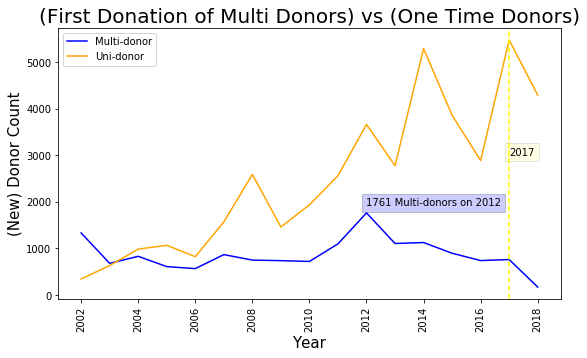

In [17]:
fig = plt.figure(figsize = (9,5))
plt.plot(time_line_data_year['YEAR'], time_line_data_year['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(time_line_data_year['YEAR'], time_line_data_year['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('(First Donation of Multi Donors) vs (One Time Donors)', fontsize = 20)
plt.text(2012,1911,"1761 Multi-donors on 2012",fontsize=10,bbox=dict(facecolor='blue', alpha=0.2))
plt.axvline(x=2017,color='yellow',linestyle ='--')
plt.text(2017,3000,"2017",fontsize=10,bbox=dict(facecolor='yellow', alpha=0.1))
plt.legend()
plt.savefig("SQLDATA/PYTHON_OUTPUTS/multi_donor_vs_uni_donor_year.png")
plt.show()

Clearly there is a general trend in the rise of Uni-donors as compared to Multi-donors. LUF got most Multi-donors in the 2012 than in any other year. Why? <br>

2002 is an interesting year for LUF. It is the only year where number of Multi-donors is more than the number of Uni-donors. The main reason for this as you'll see later is because of the credit called 'Sagalassos Research Project'. More than 700 multi-donors signed up to donate to this fund in the year 2002.

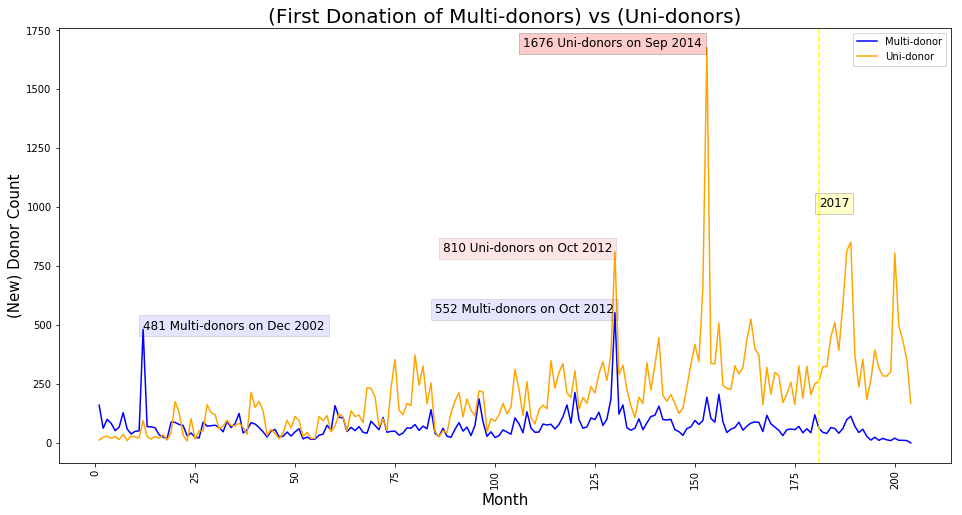

In [18]:
#Plot using Month
fig = plt.figure(figsize = (16,8))
plt.plot(time_line_data_comb['ZLUF_DOCDATE_M_N'], time_line_data_comb['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(time_line_data_comb['ZLUF_DOCDATE_M_N'], time_line_data_comb['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Month', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('(First Donation of Multi-donors) vs (Uni-donors)', fontsize = 20)
plt.text(12,481,"481 Multi-donors on Dec 2002",fontsize=12,bbox=dict(facecolor='blue', alpha=0.1))
plt.text(85,552,"552 Multi-donors on Oct 2012",fontsize=12,bbox=dict(facecolor='blue', alpha=0.1))
plt.text(87,810,"810 Uni-donors on Oct 2012",fontsize=12,bbox=dict(facecolor='red', alpha=0.1))
plt.text(107,1680,"1676 Uni-donors on Sep 2014",fontsize=12,bbox=dict(facecolor='red', alpha=0.2))#153
plt.axvline(x=181,color='yellow',linestyle ='--')
plt.text(181,1000,"2017",fontsize=12,bbox=dict(facecolor='yellow', alpha=0.2))
plt.savefig("SQLDATA/PYTHON_OUTPUTS/multi_donor_vs_uni_donor_monthly.png")
plt.show()

You can see there is a clear spike in the number of donations made by Uni-donors in Sep 2014. <br>

What was so special about Sep 2014? <br>
A research on Google showed that from June - September 2014, the <b>Ice Bucket Challenge</b> was trending virally on Social Media. <br>
But what does the Ice Bucket Challenge has to do with the LUF? <br>
It turns out that the main purpose of Ice Bucket Challenge was to spread the awareness of <b><i>ALS (Amyotrophic Lateral Sclerosis)</i></b> disease. This is the same disease that affected Stephen Hawking. <br>
LUF has a couple of funds that is mainly concerned with ALS namely <i>Fonds Een hart voor ALS </i> and <i>Laeversfonds voor ALS onderzoek</i>. In the analysis below, you'll see that many Uni-donors have donated to these two funds on Sep 2014. That's why the huge peak.

In [19]:
key_analysis = main_data[['PARTNER','TYPE','CREDIT_DESCRIPTION','ZLUF_DOCDATE','ZZAMNT_PAYED_NORM','IS_MULTI_DONOR']]
key_analysis['ZLUF_DOCDATE'] = pd.to_datetime(key_analysis['ZLUF_DOCDATE'])
key_analysis['ZLUF_DOCDATE_Y'] = key_analysis['ZLUF_DOCDATE'].dt.year
key_analysis['ZLUF_DOCDATE_M'] = key_analysis['ZLUF_DOCDATE'].dt.month
key_analysis['ZLUF_DOCDATE_M_N'] = (key_analysis['ZLUF_DOCDATE_Y'] - 
                                          key_analysis['ZLUF_DOCDATE'].min().to_pydatetime()
                                          .year) * 12 + key_analysis['ZLUF_DOCDATE_M']

#Top 5 funds donated by Uni-donors on Sep 2014
sep_2014_ka_ud = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==153) & (key_analysis['IS_MULTI_DONOR']==0)]
sep_2014_ka_ud.reset_index(drop=True,inplace=True)
print(sep_2014_ka_ud.shape)
sep_2014_ka_ud['CREDIT_DESCRIPTION'].value_counts()[:5]

(1676, 9)


Fonds Een hart voor ALS           1030
Bone4Kids Fonds                    120
Laeversfonds voor ALSonderzoek      83
Université Bujumbura                74
Kinderkankerfonds Leuven            72
Name: CREDIT_DESCRIPTION, dtype: int64

<i>Fonds Een hart voor ALS</i> received 1030 donations on the month of Sep 2014 from Uni-donors. This confirms the theory that the spike was due to Ice Bucket Challenge.

In [20]:
#Top 5 funds donated by Multi-donors on Sep 2014
sep_2014_ka_md = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==153) & (key_analysis['IS_MULTI_DONOR']==1)]
sep_2014_ka_md.reset_index(drop=True,inplace=True)
print(sep_2014_ka_md.shape)
sep_2014_ka_md['CREDIT_DESCRIPTION'].value_counts()[:5]

(194, 9)


Fonds Een hart voor ALS               53
Bone4Kids Fonds                       42
KID-Fonds                             38
Rondoufonds voor Duchenneonderzoek    10
Université Bujumbura                   8
Name: CREDIT_DESCRIPTION, dtype: int64

Fonds Een hart voor ALS received 53 donations on the month of Sep 2014 from Multi-donors.<br> 
So only about 5% (53/(53+1030)) of the donors who first donated to Fonds Een hart voor ALS in the month of Sep 2014 went on to become Multi-donors.

In [21]:
#For Uni donor
credit_subset = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==153) & (key_analysis['IS_MULTI_DONOR']==0)]
credit_subset = credit_subset[['CREDIT_DESCRIPTION','ZZAMNT_PAYED_NORM']]
#Warning: Takes about 10 minutes to execute. If needed, I have already exported it to 'Donor_Amount_Stats.
ud_sep2014_aggregate = pd.DataFrame(group.describe().rename(columns={'ZZAMNT_PAYED_NORM':name}).squeeze()
                         for name, group in credit_subset.groupby('CREDIT_DESCRIPTION'))
ud_sep2014_aggregate['CREDIT_DESCRIPTION'] = ud_sep2014_aggregate.index
ud_sep2014_aggregate = ud_sep2014_aggregate.reset_index(drop=True)
ud_sep2014_aggregate = ud_sep2014_aggregate.rename(columns={'count':'CREDIT_COUNT',
                                      'mean':'CREDIT_MEAN',
                                      'std':'CREDIT_STD',
                                      'min':'CREDIT_MIN',
                                      '25%':'CREDIT_25',
                                      '50%':'CREDIT_MEDIAN',
                                      '75%':'CREDIT_75',
                                      'max':'CREDIT_MAX'})
front = ud_sep2014_aggregate['CREDIT_DESCRIPTION']
ud_sep2014_aggregate.drop(labels=['CREDIT_DESCRIPTION'], axis=1,inplace = True)
ud_sep2014_aggregate.insert(0, 'CREDIT_DESCRIPTION', front)
ud_sep2014_aggregate['CREDIT_COUNT'] = ud_sep2014_aggregate['CREDIT_COUNT'].astype(int)
ud_sep2014_aggregate['CREDIT_SUM'] = ud_sep2014_aggregate['CREDIT_MEAN'] * ud_sep2014_aggregate['CREDIT_COUNT']
ud_sep2014_aggregate = ud_sep2014_aggregate.sort_values(['CREDIT_COUNT'],ascending=[False])
ud_sep2014_aggregate = ud_sep2014_aggregate.drop(['CREDIT_25', 'CREDIT_75'],axis=1)
ud_sep2014_aggregate['CREDIT_MEAN'] = ud_sep2014_aggregate['CREDIT_MEAN'].round(2)
ud_sep2014_aggregate['CREDIT_STD'] = ud_sep2014_aggregate['CREDIT_STD'].round(2)
ud_sep2014_aggregate.reset_index(drop=True,inplace=True)
print(ud_sep2014_aggregate.shape)
ud_sep2014_aggregate.head()

(34, 8)


,CREDIT_DESCRIPTION,CREDIT_COUNT,CREDIT_MEAN,CREDIT_STD,CREDIT_MIN,CREDIT_MEDIAN,CREDIT_MAX,CREDIT_SUM
0,Fonds Een hart voor ALS,1030,29.97,70.94,1.0,20.0,2000.0,30869.96
1,Bone4Kids Fonds,120,253.65,1371.39,5.0,27.5,10300.0,30437.80
2,Laeversfonds voor ALSonderzoek,83,22.11,23.33,2.5,15.0,100.0,1835.00
3,Université Bujumbura,74,46.05,64.58,7.5,30.0,500.0,3407.50
4,Kinderkankerfonds Leuven,72,78.54,106.63,15.0,45.0,500.0,5655.00


In [22]:
#For Multi donor
credit_subset = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==153) & (key_analysis['IS_MULTI_DONOR']==1)]
credit_subset = credit_subset[['CREDIT_DESCRIPTION','ZZAMNT_PAYED_NORM']]
#Warning: Takes about 10 minutes to execute. If needed, I have already exported it to 'Donor_Amount_Stats.
md_sep2014_aggregate = pd.DataFrame(group.describe().rename(columns={'ZZAMNT_PAYED_NORM':name}).squeeze()
                         for name, group in credit_subset.groupby('CREDIT_DESCRIPTION'))
md_sep2014_aggregate['CREDIT_DESCRIPTION'] = md_sep2014_aggregate.index
md_sep2014_aggregate = md_sep2014_aggregate.reset_index(drop=True)
md_sep2014_aggregate = md_sep2014_aggregate.rename(columns={'count':'CREDIT_COUNT',
                                      'mean':'CREDIT_MEAN',
                                      'std':'CREDIT_STD',
                                      'min':'CREDIT_MIN',
                                      '25%':'CREDIT_25',
                                      '50%':'CREDIT_MEDIAN',
                                      '75%':'CREDIT_75',
                                      'max':'CREDIT_MAX'})
front = md_sep2014_aggregate['CREDIT_DESCRIPTION']
md_sep2014_aggregate.drop(labels=['CREDIT_DESCRIPTION'], axis=1,inplace = True)
md_sep2014_aggregate.insert(0, 'CREDIT_DESCRIPTION', front)
md_sep2014_aggregate['CREDIT_COUNT'] = md_sep2014_aggregate['CREDIT_COUNT'].astype(int)
md_sep2014_aggregate['CREDIT_SUM'] = md_sep2014_aggregate['CREDIT_MEAN'] * md_sep2014_aggregate['CREDIT_COUNT']
md_sep2014_aggregate = md_sep2014_aggregate.sort_values(['CREDIT_COUNT'],ascending=[False])
md_sep2014_aggregate = md_sep2014_aggregate.drop(['CREDIT_25', 'CREDIT_75'],axis=1)
md_sep2014_aggregate['CREDIT_MEAN'] = md_sep2014_aggregate['CREDIT_MEAN'].round(2)
md_sep2014_aggregate['CREDIT_STD'] = md_sep2014_aggregate['CREDIT_STD'].round(2)
md_sep2014_aggregate.reset_index(drop=True,inplace=True)
print(md_sep2014_aggregate.shape)
md_sep2014_aggregate.head()

(25, 8)


,CREDIT_DESCRIPTION,CREDIT_COUNT,CREDIT_MEAN,CREDIT_STD,CREDIT_MIN,CREDIT_MEDIAN,CREDIT_MAX,CREDIT_SUM
0,Fonds Een hart voor ALS,53,47.85,38.56,5.0,31.5,187.0,2536.0
1,Bone4Kids Fonds,42,330.12,1659.81,5.0,32.5,10800.0,13865.0
2,KID-Fonds,38,52.68,88.88,10.0,25.0,427.0,2002.0
3,Rondoufonds voor Duchenneonderzoek,10,545.00,1565.61,10.0,50.0,5000.0,5450.0
4,Kinderkankerfonds Leuven,8,148.12,188.36,15.0,60.0,450.0,1185.0


Even though Fonds Een hart voor ALS received more than 6 times the number of donations as received by Bone4Kids Fonds in the month of Sep 2014, it didn't contribute as much money as Bone4Kids Fonds. <br>
The mean donation for Fonds Een hart voor ALS is very low when compared to Bone4Kids Fonds. <br>
It seems that most donors who donated to Fonds Een hart voor ALS during Sep 2014 was due to their propensity to be a part of the trend. It also shows the influence of social media.

October 2012 was also an interesting month for LUF as it received many multi-donors and uni-donors in this month. Let's see the top donated credits that new donors donated in this montn.

In [44]:
key_analysis = main_data[['PARTNER','TYPE','CREDIT_DESCRIPTION','ZLUF_DOCDATE','ZZAMNT_PAYED_NORM','IS_MULTI_DONOR']]
key_analysis['ZLUF_DOCDATE'] = pd.to_datetime(key_analysis['ZLUF_DOCDATE'])
key_analysis['ZLUF_DOCDATE_Y'] = key_analysis['ZLUF_DOCDATE'].dt.year
key_analysis['ZLUF_DOCDATE_M'] = key_analysis['ZLUF_DOCDATE'].dt.month
key_analysis['ZLUF_DOCDATE_M_N'] = (key_analysis['ZLUF_DOCDATE_Y'] - 
                                          key_analysis['ZLUF_DOCDATE'].min().to_pydatetime()
                                          .year) * 12 + key_analysis['ZLUF_DOCDATE_M']

#Top 5 funds donated by Uni-donors on Oct 2012
oct_2012_ka_ud = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==130) & (key_analysis['IS_MULTI_DONOR']==0)]
oct_2012_ka_ud.reset_index(drop=True,inplace=True)
print(oct_2012_ka_ud.shape)
oct_2012_ka_ud['CREDIT_DESCRIPTION'].value_counts()[:5]

(810, 9)


Carpe Diem Fonds voor Diabetesonderzoek    254
Fonds Kiwanis Club Leuven                  205
Rondoufonds voor Duchenneonderzoek          85
afdeling Kindergeneeskunde                  74
LUMOS                                       35
Name: CREDIT_DESCRIPTION, dtype: int64

In [43]:
#Top 5 funds donated by Multi-donors on Oct 2012
oct_2012_ka_ud = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==130) & (key_analysis['IS_MULTI_DONOR']==1)]
oct_2012_ka_ud.reset_index(drop=True,inplace=True)
print(oct_2012_ka_ud.shape)
oct_2012_ka_ud['CREDIT_DESCRIPTION'].value_counts()[:5]

(552, 9)


Fonds Kiwanis Club Leuven                  404
Carpe Diem Fonds voor Diabetesonderzoek     39
Bibliotheekfonds                            19
afdeling Kindergeneeskunde                  17
Rondoufonds voor Duchenneonderzoek          16
Name: CREDIT_DESCRIPTION, dtype: int64

In [52]:
#For Uni donor
credit_subset = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==130) & (key_analysis['IS_MULTI_DONOR']==0)]
credit_subset = credit_subset[['CREDIT_DESCRIPTION','ZZAMNT_PAYED_NORM']]
#Warning: Takes about 10 minutes to execute. If needed, I have already exported it to 'Donor_Amount_Stats.
ud_oct_2012_aggregate = pd.DataFrame(group.describe().rename(columns={'ZZAMNT_PAYED_NORM':name}).squeeze()
                         for name, group in credit_subset.groupby('CREDIT_DESCRIPTION'))
ud_oct_2012_aggregate['CREDIT_DESCRIPTION'] = ud_oct_2012_aggregate.index
ud_oct_2012_aggregate = ud_oct_2012_aggregate.reset_index(drop=True)
ud_oct_2012_aggregate = ud_oct_2012_aggregate.rename(columns={'count':'CREDIT_COUNT',
                                      'mean':'CREDIT_MEAN',
                                      'std':'CREDIT_STD',
                                      'min':'CREDIT_MIN',
                                      '25%':'CREDIT_25',
                                      '50%':'CREDIT_MEDIAN',
                                      '75%':'CREDIT_75',
                                      'max':'CREDIT_MAX'})
front = ud_oct_2012_aggregate['CREDIT_DESCRIPTION']
ud_oct_2012_aggregate.drop(labels=['CREDIT_DESCRIPTION'], axis=1,inplace = True)
ud_oct_2012_aggregate.insert(0, 'CREDIT_DESCRIPTION', front)
ud_oct_2012_aggregate['CREDIT_COUNT'] = ud_oct_2012_aggregate['CREDIT_COUNT'].astype(int)
ud_oct_2012_aggregate['CREDIT_SUM'] = ud_oct_2012_aggregate['CREDIT_MEAN'] * ud_oct_2012_aggregate['CREDIT_COUNT']
ud_oct_2012_aggregate = ud_oct_2012_aggregate.sort_values(['CREDIT_COUNT'],ascending=[False])
ud_oct_2012_aggregate = ud_oct_2012_aggregate.drop(['CREDIT_25', 'CREDIT_75'],axis=1)
ud_oct_2012_aggregate['CREDIT_MEAN'] = ud_oct_2012_aggregate['CREDIT_MEAN'].round(2)
ud_oct_2012_aggregate['CREDIT_STD'] = ud_oct_2012_aggregate['CREDIT_STD'].round(2)
ud_oct_2012_aggregate.reset_index(drop=True,inplace=True)
print(ud_oct_2012_aggregate.shape)
ud_oct_2012_aggregate.head()

(23, 8)


,CREDIT_DESCRIPTION,CREDIT_COUNT,CREDIT_MEAN,CREDIT_STD,CREDIT_MIN,CREDIT_MEDIAN,CREDIT_MAX,CREDIT_SUM
0,Carpe Diem Fonds voor Diabetesonderzoek,254,44.97,44.11,7.5,30.00,500.0,11422.5
1,Fonds Kiwanis Club Leuven,205,21.46,17.48,1.5,20.00,100.0,4399.0
2,Rondoufonds voor Duchenneonderzoek,85,42.39,44.85,10.0,25.00,300.0,3602.9
3,afdeling Kindergeneeskunde,74,40.57,33.47,10.0,33.75,250.0,3002.5
4,LUMOS,35,50.57,31.87,20.0,50.00,150.0,1770.0


In [53]:
#For Uni donor
credit_subset = key_analysis[(key_analysis['ZLUF_DOCDATE_M_N']==130) & (key_analysis['IS_MULTI_DONOR']==1)]
credit_subset = credit_subset[['CREDIT_DESCRIPTION','ZZAMNT_PAYED_NORM']]
#Warning: Takes about 10 minutes to execute. If needed, I have already exported it to 'Donor_Amount_Stats.
ud_oct_2012_aggregate = pd.DataFrame(group.describe().rename(columns={'ZZAMNT_PAYED_NORM':name}).squeeze()
                         for name, group in credit_subset.groupby('CREDIT_DESCRIPTION'))
ud_oct_2012_aggregate['CREDIT_DESCRIPTION'] = ud_oct_2012_aggregate.index
ud_oct_2012_aggregate = ud_oct_2012_aggregate.reset_index(drop=True)
ud_oct_2012_aggregate = ud_oct_2012_aggregate.rename(columns={'count':'CREDIT_COUNT',
                                      'mean':'CREDIT_MEAN',
                                      'std':'CREDIT_STD',
                                      'min':'CREDIT_MIN',
                                      '25%':'CREDIT_25',
                                      '50%':'CREDIT_MEDIAN',
                                      '75%':'CREDIT_75',
                                      'max':'CREDIT_MAX'})
front = ud_oct_2012_aggregate['CREDIT_DESCRIPTION']
ud_oct_2012_aggregate.drop(labels=['CREDIT_DESCRIPTION'], axis=1,inplace = True)
ud_oct_2012_aggregate.insert(0, 'CREDIT_DESCRIPTION', front)
ud_oct_2012_aggregate['CREDIT_COUNT'] = ud_oct_2012_aggregate['CREDIT_COUNT'].astype(int)
ud_oct_2012_aggregate['CREDIT_SUM'] = ud_oct_2012_aggregate['CREDIT_MEAN'] * ud_oct_2012_aggregate['CREDIT_COUNT']
ud_oct_2012_aggregate = ud_oct_2012_aggregate.sort_values(['CREDIT_COUNT'],ascending=[False])
ud_oct_2012_aggregate = ud_oct_2012_aggregate.drop(['CREDIT_25', 'CREDIT_75'],axis=1)
ud_oct_2012_aggregate['CREDIT_MEAN'] = ud_oct_2012_aggregate['CREDIT_MEAN'].round(2)
ud_oct_2012_aggregate['CREDIT_STD'] = ud_oct_2012_aggregate['CREDIT_STD'].round(2)
ud_oct_2012_aggregate.reset_index(drop=True,inplace=True)
print(ud_oct_2012_aggregate.shape)
ud_oct_2012_aggregate.head()

(23, 8)


,CREDIT_DESCRIPTION,CREDIT_COUNT,CREDIT_MEAN,CREDIT_STD,CREDIT_MIN,CREDIT_MEDIAN,CREDIT_MAX,CREDIT_SUM
0,Fonds Kiwanis Club Leuven,404,23.84,17.02,2.5,20.00,100.0,9633.27
1,Carpe Diem Fonds voor Diabetesonderzoek,39,53.53,79.24,15.0,30.00,500.0,2087.50
2,Bibliotheekfonds,19,40.53,23.62,20.0,25.00,100.0,770.00
3,afdeling Kindergeneeskunde,17,35.15,21.50,20.0,25.00,100.0,597.50
4,Rondoufonds voor Duchenneonderzoek,16,249.22,788.91,15.0,33.75,3200.0,3987.50


## Individual credit analysis

In the below section we will analyse the donations of the few interesting credits.

In [23]:
main_data['CREDIT_DESCRIPTION'][main_data['IS_MULTI_DONOR']==0].value_counts()[:5]

Kinderkankerfonds Leuven              6441
Zuster Jeanne Devos Fonds             4293
Fonds Een hart voor ALS               2653
Bibliotheekfonds                      1424
Rondoufonds voor Duchenneonderzoek    1274
Name: CREDIT_DESCRIPTION, dtype: int64

In [24]:
main_data['CREDIT_DESCRIPTION'][main_data['IS_MULTI_DONOR']==1].value_counts()[:5]

Sagalassos Research Project    2122
Zuster Jeanne Devos Fonds      1371
Kinderkankerfonds Leuven       1186
Fonds Kiwanis Club Leuven       541
Bibliotheekfonds                466
Name: CREDIT_DESCRIPTION, dtype: int64

## Kinderkankerfonds Leuven

Kinderkankerfonds Leuven is an interesting credit. <br>
It is the most popular credit among one time donors. <br>
~85% (6441 out of 7627) of the donors who (first) donated to Kinderkankerfonds Leuven never donated to LUF again.

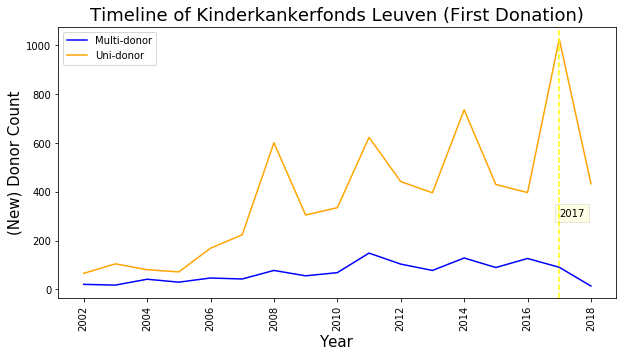

In [25]:
#Kinderkankerfonds Leuven (YEAR)
kinderkanker_ud = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven')& 
                             (key_analysis['IS_MULTI_DONOR']==0)]
kinderkanker_ud = kinderkanker_ud[['PARTNER','ZLUF_DOCDATE_Y']][kinderkanker_ud['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven'].groupby('ZLUF_DOCDATE_Y').count()
kinderkanker_ud['ZLUF_DOCDATE_Y'] = kinderkanker_ud.index
kinderkanker_ud.reset_index(drop=True,inplace=True)
kinderkanker_ud = kinderkanker_ud.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
kinderkanker_ud = kinderkanker_ud[['ZLUF_DOCDATE_Y','DON_COUNT_UNI']]

kinderkanker_md = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven')&
                             (key_analysis['IS_MULTI_DONOR']==1)]
kinderkanker_md = kinderkanker_md[['PARTNER','ZLUF_DOCDATE_Y']][kinderkanker_md['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven'].groupby('ZLUF_DOCDATE_Y').count()
kinderkanker_md['ZLUF_DOCDATE_Y'] = kinderkanker_md.index
kinderkanker_md.reset_index(drop=True,inplace=True)
kinderkanker_md = kinderkanker_md.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
kinderkanker_md = kinderkanker_md[['ZLUF_DOCDATE_Y','DON_COUNT_MULTI']]

kinderkanker = pd.merge(kinderkanker_md,kinderkanker_ud,on='ZLUF_DOCDATE_Y',how='outer')
kinderkanker = kinderkanker.fillna(0).astype(object)
kinderkanker = kinderkanker[['ZLUF_DOCDATE_Y','DON_COUNT_UNI','DON_COUNT_MULTI']]
kinderkanker = kinderkanker.sort_values('ZLUF_DOCDATE_Y')
kinderkanker = kinderkanker.fillna(0).astype(int)
kinderkanker.reset_index(drop=True,inplace=True)


fig = plt.figure(figsize = (10,5))
plt.plot(kinderkanker['ZLUF_DOCDATE_Y'], kinderkanker['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(kinderkanker['ZLUF_DOCDATE_Y'], kinderkanker['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Timeline of Kinderkankerfonds Leuven (First Donation)', fontsize = 18)
plt.axvline(x=2017,color='yellow',linestyle ='--')
plt.text(2017,300,"2017",fontsize=10,bbox=dict(facecolor='yellow', alpha=0.1))
plt.show()

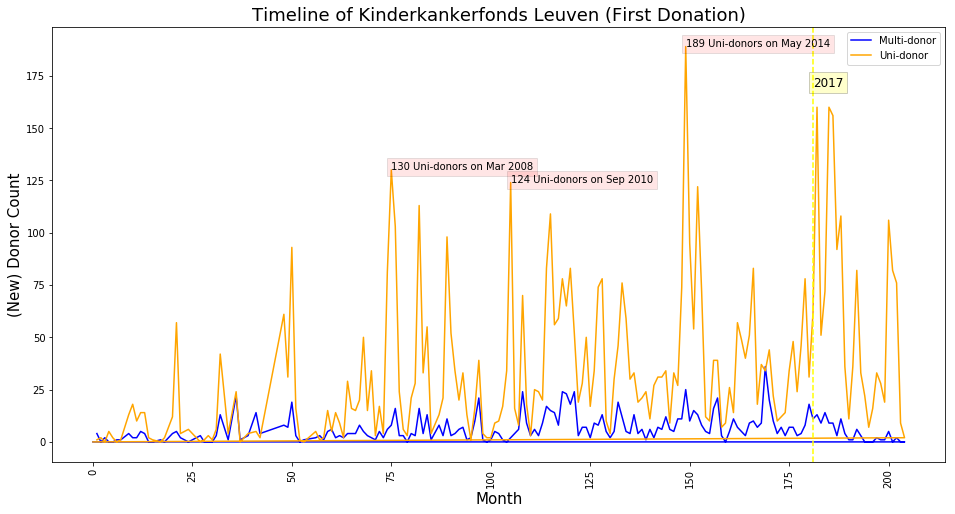

In [26]:
#Kinderkankerfonds Leuven (MONTH)
kinderkanker_ud = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven')& 
                             (key_analysis['IS_MULTI_DONOR']==0)]
kinderkanker_ud = kinderkanker_ud[['PARTNER','ZLUF_DOCDATE_M_N']][kinderkanker_ud['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven'].groupby('ZLUF_DOCDATE_M_N').count()
kinderkanker_ud['ZLUF_DOCDATE_M_N'] = kinderkanker_ud.index
kinderkanker_ud.reset_index(drop=True,inplace=True)
kinderkanker_ud = kinderkanker_ud.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
kinderkanker_ud = kinderkanker_ud[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI']]

kinderkanker_md = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven')&
                             (key_analysis['IS_MULTI_DONOR']==1)]
kinderkanker_md = kinderkanker_md[['PARTNER','ZLUF_DOCDATE_M_N']][kinderkanker_md['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven'].groupby('ZLUF_DOCDATE_M_N').count()
kinderkanker_md['ZLUF_DOCDATE_M_N'] = kinderkanker_md.index
kinderkanker_md.reset_index(drop=True,inplace=True)
kinderkanker_md = kinderkanker_md.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
kinderkanker_md = kinderkanker_md[['ZLUF_DOCDATE_M_N','DON_COUNT_MULTI']]

kinderkanker = pd.merge(kinderkanker_md,kinderkanker_ud,on='ZLUF_DOCDATE_M_N',how='outer')
kinderkanker = kinderkanker.fillna(0).astype(object)
kinderkanker = kinderkanker[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI','DON_COUNT_MULTI']]
kinderkanker = kinderkanker.sort_values('ZLUF_DOCDATE_M_N')
kinderkanker = kinderkanker.fillna(0).astype(int)
kinderkanker.reset_index(drop=True,inplace=True)


fig = plt.figure(figsize = (16,8))
kinderkanker = pd.merge(kinderkanker,my_to_m_n_df,left_on='ZLUF_DOCDATE_M_N',right_on='MONTH_N',how='outer')
kinderkanker = kinderkanker[['ZLUF_DOCDATE_M_N','YEAR_MONTH','DON_COUNT_UNI','DON_COUNT_MULTI']]
kinderkanker[['DON_COUNT_UNI','DON_COUNT_MULTI','ZLUF_DOCDATE_M_N']] = kinderkanker[['DON_COUNT_UNI','DON_COUNT_MULTI','ZLUF_DOCDATE_M_N']].fillna(0).astype(int)
plt.plot(kinderkanker['ZLUF_DOCDATE_M_N'], kinderkanker['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(kinderkanker['ZLUF_DOCDATE_M_N'], kinderkanker['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Month', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Timeline of Kinderkankerfonds Leuven (First Donation)', fontsize = 18)
plt.axvline(x=181,color='yellow',linestyle ='--')
plt.text(181,170,"2017",fontsize=12,bbox=dict(facecolor='yellow', alpha=0.2))#Jan 2017
plt.text(149,189,"189 Uni-donors on May 2014",fontsize=10,bbox=dict(facecolor='red', alpha=0.1))
plt.text(75,130,"130 Uni-donors on Mar 2008",fontsize=10,bbox=dict(facecolor='red', alpha=0.1))
plt.text(105,124,"124 Uni-donors on Sep 2010",fontsize=10,bbox=dict(facecolor='red', alpha=0.1))
plt.show()

## Zuster Jeanne Devos Fonds

Zuster Jeanne Devos Fonds is another popular credit among one time donors. <br>
~76% (4293 out of 5664) of the donors who (first) donated to Zuster Jeanne Devos Fonds never donated to LUF again. <br>

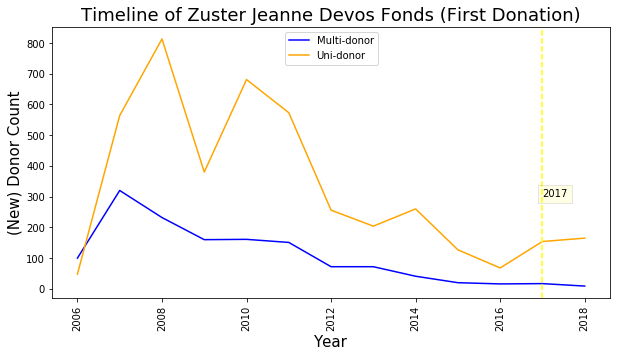

In [27]:
#Zuster Jeanne Devos Fonds (YEAR)
zuster_jdf_ud = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds') & 
                             (key_analysis['IS_MULTI_DONOR']==0)]
zuster_jdf_ud = zuster_jdf_ud[['PARTNER','ZLUF_DOCDATE_Y']][zuster_jdf_ud['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds'].groupby('ZLUF_DOCDATE_Y').count()
zuster_jdf_ud['ZLUF_DOCDATE_Y'] = zuster_jdf_ud.index
zuster_jdf_ud.reset_index(drop=True,inplace=True)
zuster_jdf_ud = zuster_jdf_ud.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
zuster_jdf_ud = zuster_jdf_ud[['ZLUF_DOCDATE_Y','DON_COUNT_UNI']]

zuster_jdf_md = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds') &
                             (key_analysis['IS_MULTI_DONOR']==1)]
zuster_jdf_md = zuster_jdf_md[['PARTNER','ZLUF_DOCDATE_Y']][zuster_jdf_md['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds'].groupby('ZLUF_DOCDATE_Y').count()
zuster_jdf_md['ZLUF_DOCDATE_Y'] = zuster_jdf_md.index
zuster_jdf_md.reset_index(drop=True,inplace=True)
zuster_jdf_md = zuster_jdf_md.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
zuster_jdf_md = zuster_jdf_md[['ZLUF_DOCDATE_Y','DON_COUNT_MULTI']]

zuster_jdf = pd.merge(zuster_jdf_md,zuster_jdf_ud,on='ZLUF_DOCDATE_Y',how='outer')
zuster_jdf = zuster_jdf.fillna(0).astype(object)
zuster_jdf = zuster_jdf[['ZLUF_DOCDATE_Y','DON_COUNT_UNI','DON_COUNT_MULTI']]
zuster_jdf = zuster_jdf.sort_values('ZLUF_DOCDATE_Y')
zuster_jdf = zuster_jdf.fillna(0).astype(int)
zuster_jdf.reset_index(drop=True,inplace=True)


fig = plt.figure(figsize = (10,5))
plt.plot(zuster_jdf['ZLUF_DOCDATE_Y'], zuster_jdf['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(zuster_jdf['ZLUF_DOCDATE_Y'], zuster_jdf['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Timeline of Zuster Jeanne Devos Fonds (First Donation)', fontsize = 18)
plt.axvline(x=2017,color='yellow',linestyle ='--')
plt.text(2017,300,"2017",fontsize=10,bbox=dict(facecolor='yellow', alpha=0.1))
plt.show()

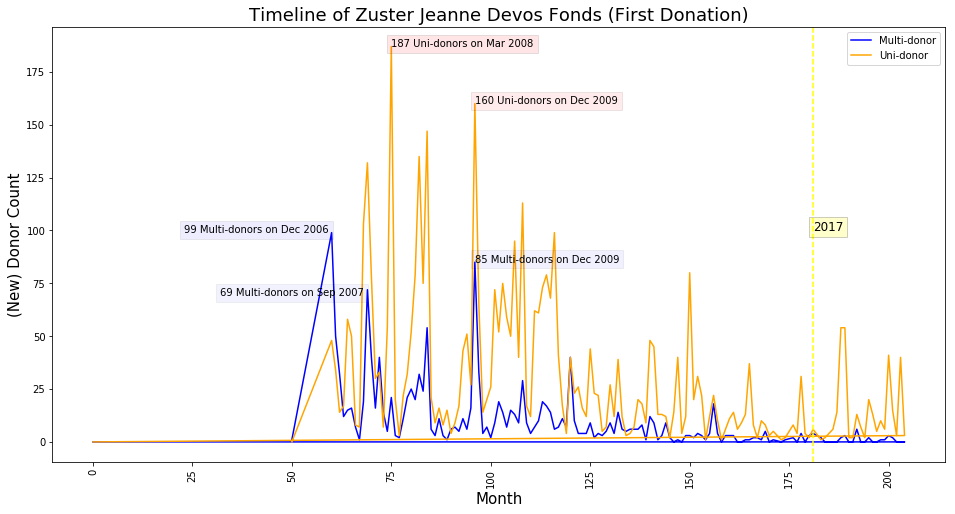

In [28]:
#Zuster Jeanne Devos Fonds (MONTH)
zuster_jdf_ud = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds') & 
                             (key_analysis['IS_MULTI_DONOR']==0)]
zuster_jdf_ud = zuster_jdf_ud[['PARTNER','ZLUF_DOCDATE_M_N']][zuster_jdf_ud['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds'].groupby('ZLUF_DOCDATE_M_N').count()
zuster_jdf_ud['ZLUF_DOCDATE_M_N'] = zuster_jdf_ud.index
zuster_jdf_ud.reset_index(drop=True,inplace=True)
zuster_jdf_ud = zuster_jdf_ud.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
zuster_jdf_ud = zuster_jdf_ud[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI']]

zuster_jdf_md = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds') &
                             (key_analysis['IS_MULTI_DONOR']==1)]
zuster_jdf_md = zuster_jdf_md[['PARTNER','ZLUF_DOCDATE_M_N']][zuster_jdf_md['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds'].groupby('ZLUF_DOCDATE_M_N').count()
zuster_jdf_md['ZLUF_DOCDATE_M_N'] = zuster_jdf_md.index
zuster_jdf_md.reset_index(drop=True,inplace=True)
zuster_jdf_md = zuster_jdf_md.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
zuster_jdf_md = zuster_jdf_md[['ZLUF_DOCDATE_M_N','DON_COUNT_MULTI']]

zuster_jdf = pd.merge(zuster_jdf_md,zuster_jdf_ud,on='ZLUF_DOCDATE_M_N',how='outer')
zuster_jdf = zuster_jdf.fillna(0).astype(object)
zuster_jdf = zuster_jdf[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI','DON_COUNT_MULTI']]
zuster_jdf = zuster_jdf.sort_values('ZLUF_DOCDATE_M_N')
zuster_jdf = zuster_jdf.fillna(0).astype(int)
zuster_jdf.reset_index(drop=True,inplace=True)


fig = plt.figure(figsize = (16,8))
zuster_jdf = pd.merge(zuster_jdf,my_to_m_n_df,left_on='ZLUF_DOCDATE_M_N',right_on='MONTH_N',how='outer')
zuster_jdf = zuster_jdf[['ZLUF_DOCDATE_M_N','YEAR_MONTH','DON_COUNT_UNI','DON_COUNT_MULTI']]
zuster_jdf[['DON_COUNT_UNI','DON_COUNT_MULTI','ZLUF_DOCDATE_M_N']] = zuster_jdf[['DON_COUNT_UNI','DON_COUNT_MULTI','ZLUF_DOCDATE_M_N']].fillna(0).astype(int)
plt.plot(zuster_jdf['ZLUF_DOCDATE_M_N'], zuster_jdf['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(zuster_jdf['ZLUF_DOCDATE_M_N'], zuster_jdf['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Month', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Timeline of Zuster Jeanne Devos Fonds (First Donation)', fontsize = 18)
plt.axvline(x=181,color='yellow',linestyle ='--')
plt.text(181,100,"2017",fontsize=12,bbox=dict(facecolor='yellow', alpha=0.2))#Jan 2017
plt.text(23,99,"99 Multi-donors on Dec 2006",fontsize=10,bbox=dict(facecolor='blue', alpha=0.07))
plt.text(96,160,"160 Uni-donors on Dec 2009",fontsize=10,bbox=dict(facecolor='red', alpha=0.08))
plt.text(96,85,"85 Multi-donors on Dec 2009",fontsize=10,bbox=dict(facecolor='blue', alpha=0.06))
plt.text(32,69,"69 Multi-donors on Sep 2007",fontsize=10,bbox=dict(facecolor='blue', alpha=0.05))
plt.text(75,187,"187 Uni-donors on Mar 2008",fontsize=10,bbox=dict(facecolor='red', alpha=0.1))
plt.show()

## Fonds Een hart voor ALS

This is an interesting credit to analyse due to the popularity of this fund in Sep 2014.

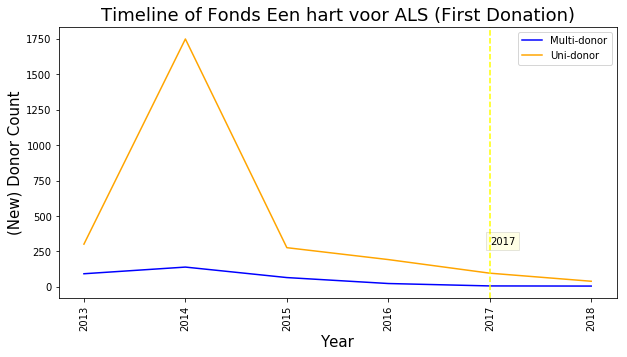

In [29]:
#Fonds Een hart voor ALS (YEAR)
fehv_als_ud = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Fonds Een hart voor ALS') & 
                             (key_analysis['IS_MULTI_DONOR']==0)]
fehv_als_ud = fehv_als_ud[['PARTNER','ZLUF_DOCDATE_Y']][fehv_als_ud['CREDIT_DESCRIPTION']=='Fonds Een hart voor ALS'].groupby('ZLUF_DOCDATE_Y').count()
fehv_als_ud['ZLUF_DOCDATE_Y'] = fehv_als_ud.index
fehv_als_ud.reset_index(drop=True,inplace=True)
fehv_als_ud = fehv_als_ud.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
fehv_als_ud = fehv_als_ud[['ZLUF_DOCDATE_Y','DON_COUNT_UNI']]

fehv_als_md = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Fonds Een hart voor ALS') &
                             (key_analysis['IS_MULTI_DONOR']==1)]
fehv_als_md = fehv_als_md[['PARTNER','ZLUF_DOCDATE_Y']][fehv_als_md['CREDIT_DESCRIPTION']=='Fonds Een hart voor ALS'].groupby('ZLUF_DOCDATE_Y').count()
fehv_als_md['ZLUF_DOCDATE_Y'] = fehv_als_md.index
fehv_als_md.reset_index(drop=True,inplace=True)
fehv_als_md = fehv_als_md.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
fehv_als_md = fehv_als_md[['ZLUF_DOCDATE_Y','DON_COUNT_MULTI']]

fehv_als = pd.merge(fehv_als_md,fehv_als_ud,on='ZLUF_DOCDATE_Y',how='outer')
fehv_als = fehv_als.fillna(0).astype(object)
fehv_als = fehv_als[['ZLUF_DOCDATE_Y','DON_COUNT_UNI','DON_COUNT_MULTI']]
fehv_als = fehv_als.sort_values('ZLUF_DOCDATE_Y')
fehv_als = fehv_als.fillna(0).astype(int)
fehv_als.reset_index(drop=True,inplace=True)


fig = plt.figure(figsize = (10,5))
plt.plot(fehv_als['ZLUF_DOCDATE_Y'], fehv_als['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(fehv_als['ZLUF_DOCDATE_Y'], fehv_als['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Timeline of Fonds Een hart voor ALS (First Donation)', fontsize = 18)
plt.axvline(x=2017,color='yellow',linestyle ='--')
plt.text(2017,300,"2017",fontsize=10,bbox=dict(facecolor='yellow', alpha=0.1))
plt.show()

Fonds Een hart voor ALS was actually started in Sep 2013, was highly popular in Sep 2014 and started declining after the viral trend was over.

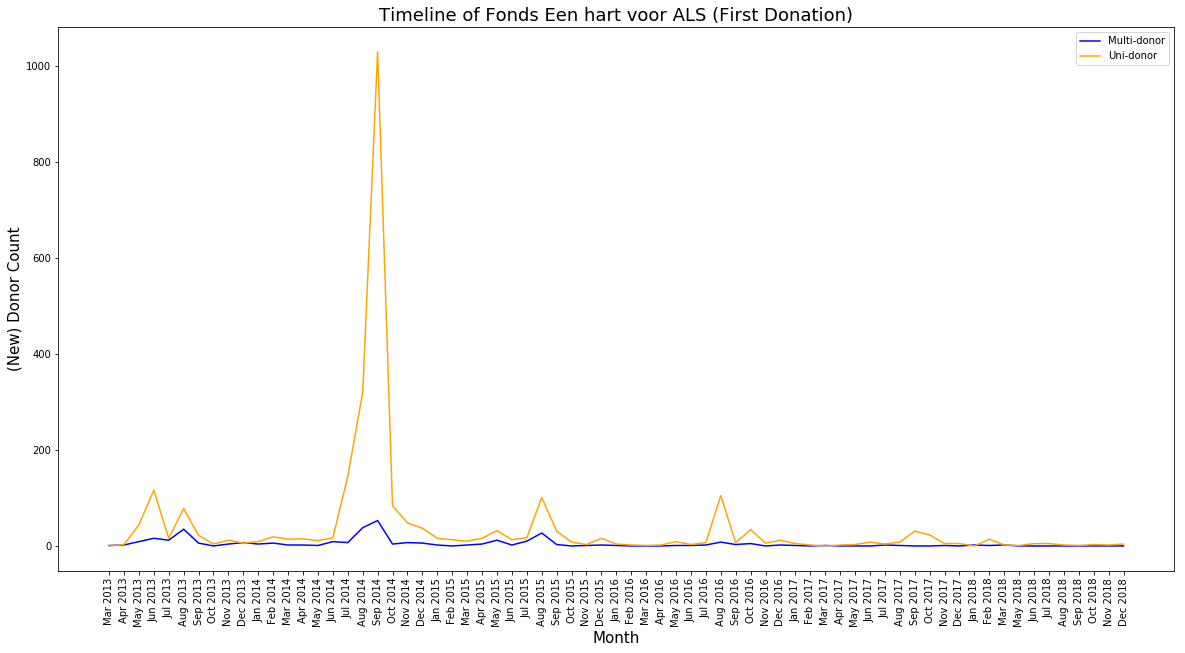

In [30]:
#Fonds Een hart voor ALS (MONTHLY)
fehv_als_ud = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Fonds Een hart voor ALS') & 
                             (key_analysis['IS_MULTI_DONOR']==0)]
fehv_als_ud = fehv_als_ud[['PARTNER','ZLUF_DOCDATE_M_N']][fehv_als_ud['CREDIT_DESCRIPTION']=='Fonds Een hart voor ALS'].groupby('ZLUF_DOCDATE_M_N').count()
fehv_als_ud['ZLUF_DOCDATE_M_N'] = fehv_als_ud.index
fehv_als_ud.reset_index(drop=True,inplace=True)
fehv_als_ud = fehv_als_ud.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
fehv_als_ud = fehv_als_ud[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI']]

fehv_als_md = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Fonds Een hart voor ALS') &
                             (key_analysis['IS_MULTI_DONOR']==1)]
fehv_als_md = fehv_als_md[['PARTNER','ZLUF_DOCDATE_M_N']][fehv_als_md['CREDIT_DESCRIPTION']=='Fonds Een hart voor ALS'].groupby('ZLUF_DOCDATE_M_N').count()
fehv_als_md['ZLUF_DOCDATE_M_N'] = fehv_als_md.index
fehv_als_md.reset_index(drop=True,inplace=True)
fehv_als_md = fehv_als_md.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
fehv_als_md = fehv_als_md[['ZLUF_DOCDATE_M_N','DON_COUNT_MULTI']]

fehv_als = pd.merge(fehv_als_md,fehv_als_ud,on='ZLUF_DOCDATE_M_N',how='outer')
fehv_als = fehv_als.fillna(0).astype(object)
fehv_als = fehv_als[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI','DON_COUNT_MULTI']]
fehv_als = fehv_als.sort_values('ZLUF_DOCDATE_M_N')
fehv_als = fehv_als.fillna(0).astype(int)
fehv_als.reset_index(drop=True,inplace=True)


fig = plt.figure(figsize = (20,10))
fehv_als = pd.merge(fehv_als,my_to_m_n_df,left_on='ZLUF_DOCDATE_M_N',right_on='MONTH_N',how='inner')
plt.plot(fehv_als['YEAR_MONTH'], fehv_als['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(fehv_als['YEAR_MONTH'], fehv_als['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Month', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Timeline of Fonds Een hart voor ALS (First Donation)', fontsize = 18)
#plt.axvline(x=2017,color='yellow',linestyle ='--')
#plt.text(2017,300,"2017",fontsize=10,bbox=dict(facecolor='yellow', alpha=0.1))
plt.show()

You can still see some Uni-donors donating to Fonds Een hart voor ALS during the period Aug & Sep of each year.

## Sagalassos Research Project

Sagalassos Research Project is an interesting credit. It is the only credit with more Multi-donors than Uni-donors! <br>
~70% (2122 out of 3020) of the donors who (first) donated to Sagalassos Research Project donated to LUF again!

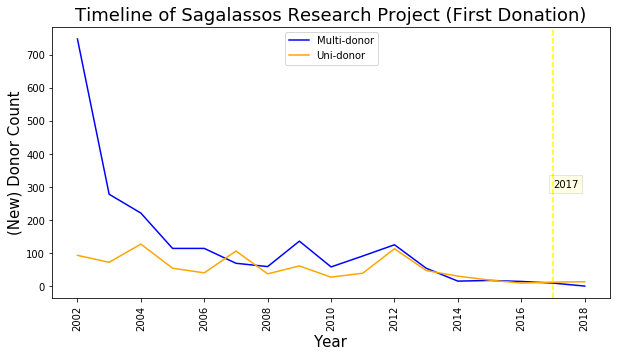

In [31]:
sagalassos_ud = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Sagalassos Research Project') &
                             (key_analysis['IS_MULTI_DONOR']==0)]
sagalassos_ud = sagalassos_ud[['PARTNER','ZLUF_DOCDATE_Y']][sagalassos_ud['CREDIT_DESCRIPTION']=='Sagalassos Research Project'].groupby('ZLUF_DOCDATE_Y').count()
sagalassos_ud['ZLUF_DOCDATE_Y'] = sagalassos_ud.index
sagalassos_ud.reset_index(drop=True,inplace=True)
sagalassos_ud = sagalassos_ud.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
sagalassos_ud = sagalassos_ud[['ZLUF_DOCDATE_Y','DON_COUNT_UNI']]

sagalassos_md = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Sagalassos Research Project') &
                             (key_analysis['IS_MULTI_DONOR']==1)]
sagalassos_md = sagalassos_md[['PARTNER','ZLUF_DOCDATE_Y']][sagalassos_md['CREDIT_DESCRIPTION']=='Sagalassos Research Project'].groupby('ZLUF_DOCDATE_Y').count()
sagalassos_md['ZLUF_DOCDATE_Y'] = sagalassos_md.index
sagalassos_md.reset_index(drop=True,inplace=True)
sagalassos_md = sagalassos_md.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
sagalassos_md = sagalassos_md[['ZLUF_DOCDATE_Y','DON_COUNT_MULTI']]

sagalassos = pd.merge(sagalassos_md,sagalassos_ud,on='ZLUF_DOCDATE_Y',how='outer')
sagalassos = sagalassos.fillna(0).astype(object)
sagalassos = sagalassos[['ZLUF_DOCDATE_Y','DON_COUNT_UNI','DON_COUNT_MULTI']]
sagalassos = sagalassos.sort_values('ZLUF_DOCDATE_Y')
sagalassos = sagalassos.fillna(0).astype(int)
sagalassos.reset_index(drop=True,inplace=True)

fig = plt.figure(figsize = (10,5))
plt.plot(sagalassos['ZLUF_DOCDATE_Y'], sagalassos['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(sagalassos['ZLUF_DOCDATE_Y'], sagalassos['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Timeline of Sagalassos Research Project (First Donation)', fontsize = 18)
plt.axvline(x=2017,color='yellow',linestyle ='--')
plt.text(2017,300,"2017",fontsize=10,bbox=dict(facecolor='yellow', alpha=0.1))
plt.show()

Sagalassos Research Project received most of it's Multi-donors during from the years 2002 - 2004.

## Fonds Kiwanis Club Leuven

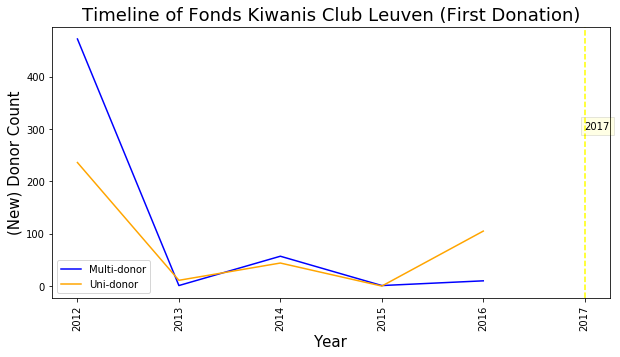

In [45]:
#Fonds Kiwanis Club Leuven (YEAR)
kiwanisclub_ud = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Fonds Kiwanis Club Leuven')& 
                             (key_analysis['IS_MULTI_DONOR']==0)]
kiwanisclub_ud = kiwanisclub_ud[['PARTNER','ZLUF_DOCDATE_Y']][kiwanisclub_ud['CREDIT_DESCRIPTION']=='Fonds Kiwanis Club Leuven'].groupby('ZLUF_DOCDATE_Y').count()
kiwanisclub_ud['ZLUF_DOCDATE_Y'] = kiwanisclub_ud.index
kiwanisclub_ud.reset_index(drop=True,inplace=True)
kiwanisclub_ud = kiwanisclub_ud.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
kiwanisclub_ud = kiwanisclub_ud[['ZLUF_DOCDATE_Y','DON_COUNT_UNI']]

kiwanisclub_md = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Fonds Kiwanis Club Leuven')&
                             (key_analysis['IS_MULTI_DONOR']==1)]
kiwanisclub_md = kiwanisclub_md[['PARTNER','ZLUF_DOCDATE_Y']][kiwanisclub_md['CREDIT_DESCRIPTION']=='Fonds Kiwanis Club Leuven'].groupby('ZLUF_DOCDATE_Y').count()
kiwanisclub_md['ZLUF_DOCDATE_Y'] = kiwanisclub_md.index
kiwanisclub_md.reset_index(drop=True,inplace=True)
kiwanisclub_md = kiwanisclub_md.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
kiwanisclub_md = kiwanisclub_md[['ZLUF_DOCDATE_Y','DON_COUNT_MULTI']]

kiwanisclub = pd.merge(kiwanisclub_md,kiwanisclub_ud,on='ZLUF_DOCDATE_Y',how='outer')
kiwanisclub = kiwanisclub.fillna(0).astype(object)
kiwanisclub = kiwanisclub[['ZLUF_DOCDATE_Y','DON_COUNT_UNI','DON_COUNT_MULTI']]
kiwanisclub = kiwanisclub.sort_values('ZLUF_DOCDATE_Y')
kiwanisclub = kiwanisclub.fillna(0).astype(int)
kiwanisclub.reset_index(drop=True,inplace=True)


fig = plt.figure(figsize = (10,5))
plt.plot(kiwanisclub['ZLUF_DOCDATE_Y'], kiwanisclub['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(kiwanisclub['ZLUF_DOCDATE_Y'], kiwanisclub['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Timeline of Fonds Kiwanis Club Leuven (First Donation)', fontsize = 18)
plt.axvline(x=2017,color='yellow',linestyle ='--')
plt.text(2017,300,"2017",fontsize=10,bbox=dict(facecolor='yellow', alpha=0.1))
plt.show()

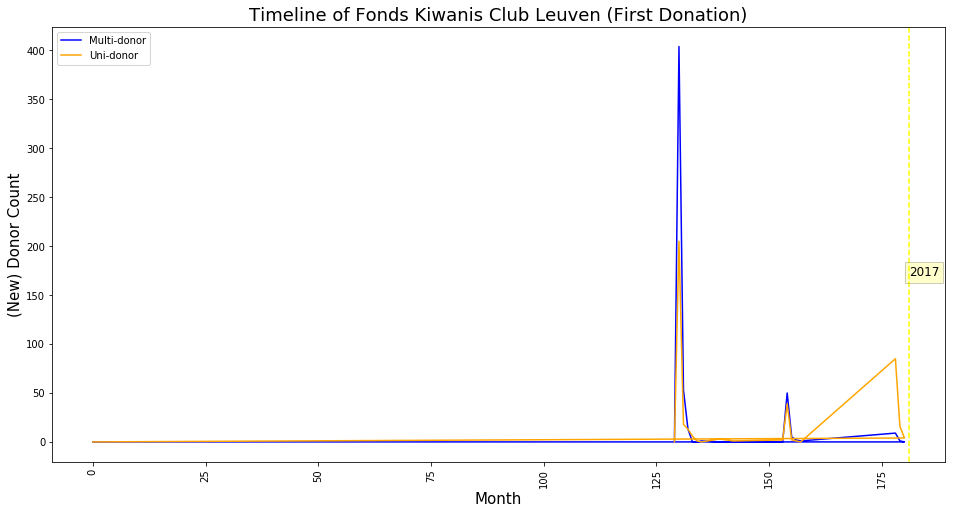

In [51]:
#Fonds Kiwanis Club Leuven (MONTH)
kiwanisclub_ud = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Fonds Kiwanis Club Leuven')& 
                             (key_analysis['IS_MULTI_DONOR']==0)]
kiwanisclub_ud = kiwanisclub_ud[['PARTNER','ZLUF_DOCDATE_M_N']][kiwanisclub_ud['CREDIT_DESCRIPTION']=='Fonds Kiwanis Club Leuven'].groupby('ZLUF_DOCDATE_M_N').count()
kiwanisclub_ud['ZLUF_DOCDATE_M_N'] = kiwanisclub_ud.index
kiwanisclub_ud.reset_index(drop=True,inplace=True)
kiwanisclub_ud = kiwanisclub_ud.rename(columns = {"PARTNER":"DON_COUNT_UNI"})
kiwanisclub_ud = kiwanisclub_ud[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI']]

kiwanisclub_md = key_analysis[(key_analysis['CREDIT_DESCRIPTION']=='Fonds Kiwanis Club Leuven')&
                             (key_analysis['IS_MULTI_DONOR']==1)]
kiwanisclub_md = kiwanisclub_md[['PARTNER','ZLUF_DOCDATE_M_N']][kiwanisclub_md['CREDIT_DESCRIPTION']=='Fonds Kiwanis Club Leuven'].groupby('ZLUF_DOCDATE_M_N').count()
kiwanisclub_md['ZLUF_DOCDATE_M_N'] = kiwanisclub_md.index
kiwanisclub_md.reset_index(drop=True,inplace=True)
kiwanisclub_md = kiwanisclub_md.rename(columns = {"PARTNER":"DON_COUNT_MULTI"})
kiwanisclub_md = kiwanisclub_md[['ZLUF_DOCDATE_M_N','DON_COUNT_MULTI']]

kiwanisclub = pd.merge(kiwanisclub_md,kiwanisclub_ud,on='ZLUF_DOCDATE_M_N',how='outer')
kiwanisclub = kiwanisclub.fillna(0).astype(object)
kiwanisclub = kiwanisclub[['ZLUF_DOCDATE_M_N','DON_COUNT_UNI','DON_COUNT_MULTI']]
kiwanisclub = kiwanisclub.sort_values('ZLUF_DOCDATE_M_N')
kiwanisclub = kiwanisclub.fillna(0).astype(int)
kiwanisclub.reset_index(drop=True,inplace=True)


fig = plt.figure(figsize = (16,8))
kiwanisclub = pd.merge(kiwanisclub,my_to_m_n_df,left_on='ZLUF_DOCDATE_M_N',right_on='MONTH_N',how='outer')
kiwanisclub = kiwanisclub[['ZLUF_DOCDATE_M_N','YEAR_MONTH','DON_COUNT_UNI','DON_COUNT_MULTI']]
kiwanisclub[['DON_COUNT_UNI','DON_COUNT_MULTI','ZLUF_DOCDATE_M_N']] = kiwanisclub[['DON_COUNT_UNI','DON_COUNT_MULTI','ZLUF_DOCDATE_M_N']].fillna(0).astype(int)
plt.plot(kiwanisclub['ZLUF_DOCDATE_M_N'], kiwanisclub['DON_COUNT_MULTI'], color='blue', label='Multi-donor')
plt.plot(kiwanisclub['ZLUF_DOCDATE_M_N'], kiwanisclub['DON_COUNT_UNI'], color='orange', label='Uni-donor')
plt.legend()
plt.xlabel('Month', fontsize = 15)
plt.ylabel('(New) Donor Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Timeline of Fonds Kiwanis Club Leuven (First Donation)', fontsize = 18)
plt.axvline(x=181,color='yellow',linestyle ='--')
plt.text(181,170,"2017",fontsize=12,bbox=dict(facecolor='yellow', alpha=0.2))#Jan 2017
plt.show()

In the below cells, we find if there are any credits which are only donated by Multi-donors and if there are any credits which are only donated by Uni-donors.

In [32]:
#This contains the value counts of each credit for both Uni-donor and Multi-donor
ud_value_counts_df = main_data['CREDIT_DESCRIPTION'][main_data['IS_MULTI_DONOR']==0].value_counts().to_frame()
ud_value_counts_df = ud_value_counts_df.rename(columns={"CREDIT_DESCRIPTION":"UNI_DONOR_COUNT"})
ud_value_counts_df['CREDIT_DESCRIPTION'] = ud_value_counts_df.index
ud_value_counts_df.reset_index(drop=True,inplace=True)
ud_value_counts_df = ud_value_counts_df[['CREDIT_DESCRIPTION','UNI_DONOR_COUNT']]

md_value_counts_df = main_data['CREDIT_DESCRIPTION'][main_data['IS_MULTI_DONOR']==1].value_counts().to_frame()
md_value_counts_df = md_value_counts_df.rename(columns={"CREDIT_DESCRIPTION":"MULTI_DONOR_COUNT"})
md_value_counts_df['CREDIT_DESCRIPTION'] = md_value_counts_df.index
md_value_counts_df.reset_index(drop=True,inplace=True)
md_value_counts_df = md_value_counts_df[['CREDIT_DESCRIPTION','MULTI_DONOR_COUNT']]

credits_value_counts_df = pd.merge(ud_value_counts_df,md_value_counts_df,on='CREDIT_DESCRIPTION',how='outer')
credits_value_counts_df[['UNI_DONOR_COUNT','MULTI_DONOR_COUNT']] = credits_value_counts_df[['UNI_DONOR_COUNT','MULTI_DONOR_COUNT']].fillna(0).astype(int)
credits_value_counts_df = credits_value_counts_df.sort_values(['UNI_DONOR_COUNT','MULTI_DONOR_COUNT'],ascending=[False,False])
credits_value_counts_df.reset_index(drop=True,inplace=True)
print(credits_value_counts_df.shape)
credits_value_counts_df.head()

(586, 3)


,CREDIT_DESCRIPTION,UNI_DONOR_COUNT,MULTI_DONOR_COUNT
0,Kinderkankerfonds Leuven,6441,1186
1,Zuster Jeanne Devos Fonds,4293,1371
2,Fonds Een hart voor ALS,2653,330
3,Bibliotheekfonds,1424,466
4,Rondoufonds voor Duchenneonderzoek,1274,377


In [33]:
#Top 10 credits only donated by Multi-donors
credits_value_counts_df[credits_value_counts_df['UNI_DONOR_COUNT']==0].head(10)

,CREDIT_DESCRIPTION,UNI_DONOR_COUNT,MULTI_DONOR_COUNT
459,Verelst Baarmoederkankerfonds,0,10
460,Farmaleuven Fonds,0,5
461,afdeling Chemische Proceskunde,0,4
462,dienst Studentenbeleid,0,4
463,afdeling Oude Nabije Oosten,0,4
464,Rectorale Diensten,0,4
465,Ruelens-Van Gorp Foundation,0,3
466,afdeling Halfgeleiderfysica,0,3
467,GSK Respiratory Pharmacology,0,3
468,project prof. Casaer kindergeneeskunde,0,3


In [34]:
#Top 10 credits only donated by Uni-donors
credits_value_counts_df[credits_value_counts_df['MULTI_DONOR_COUNT']==0].head(10)

,CREDIT_DESCRIPTION,UNI_DONOR_COUNT,MULTI_DONOR_COUNT
77,Eliott's event,84,0
129,afdeling Pneumologie,33,0
134,Exceptional Kids binnen het CME,30,0
136,"afdeling psychiatrie, angst en depressie",29,0
137,darmkankeronderzoek prof. Wolthuis,29,0
153,Omgeving & Gezondheid emeritaat B.Nemery,22,0
168,Fund Beta-Cell Research,16,0
169,Dieter De Cauderlier Fonds hersentumoren,16,0
178,Universiteitsarchief en Kunstpatrimonium,12,0
180,Fund on Transitional Justice,11,0


## Donation Analysis of top 3 donated credits

Here we are not analysing Uni-donors vs Multi-donors anymore. <br>
This section is just to understand the properties of top 3 donated credits.

In [35]:
main_data_for_gift['CREDIT_DESCRIPTION'].value_counts()[:5]

Sagalassos Research Project    17242
Zuster Jeanne Devos Fonds      15242
Kinderkankerfonds Leuven       11938
Bibliotheekfonds                4915
Fonds Sofhea Cruh               4533
Name: CREDIT_DESCRIPTION, dtype: int64

We'll analyse <i>Sagalassos Research Project</i>, <i>Zuster Jeanne Devos Fonds</i>, and <i>Kinderkankerfonds Leuven</i>

In [36]:
gift_time_line_data = main_data_for_gift[['PARTNER','ZLUF_DOCDATE','CREDIT_DESCRIPTION']]
gift_time_line_data['ZLUF_DOCDATE'] = pd.to_datetime(gift_time_line_data['ZLUF_DOCDATE'])
gift_time_line_data['ZLUF_DOCDATE_Y'] = gift_time_line_data['ZLUF_DOCDATE'].dt.year
gift_time_line_data['ZLUF_DOCDATE_M'] = gift_time_line_data['ZLUF_DOCDATE'].dt.month
gift_time_line_data['ZLUF_DOCDATE_M_N'] = (gift_time_line_data['ZLUF_DOCDATE_Y'] - 
                                          gift_time_line_data['ZLUF_DOCDATE'].min().to_pydatetime()
                                          .year) * 12 + gift_time_line_data['ZLUF_DOCDATE_M']
print(gift_time_line_data.shape) #All gifts

#Select the data for only top 3 donated gifts
gift_time_line_data = gift_time_line_data[(gift_time_line_data['CREDIT_DESCRIPTION']=='Sagalassos Research Project') | 
                                          (gift_time_line_data['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds') |
                                          (gift_time_line_data['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven')]
gift_time_line_data.reset_index(drop=True,inplace=True)
print(gift_time_line_data.shape) #Only top 3 gifts
gift_time_line_data.head()

(130932, 6)
(44422, 6)


,PARTNER,ZLUF_DOCDATE,CREDIT_DESCRIPTION,ZLUF_DOCDATE_Y,ZLUF_DOCDATE_M,ZLUF_DOCDATE_M_N
0,0200000173,2006-12-27,Zuster Jeanne Devos Fonds,2006,12,60
1,0200000370,2012-03-30,Kinderkankerfonds Leuven,2012,3,123
2,0201066118,2012-03-30,Kinderkankerfonds Leuven,2012,3,123
3,0200000424,2016-10-11,Zuster Jeanne Devos Fonds,2016,10,178
4,0201180637,2016-10-11,Zuster Jeanne Devos Fonds,2016,10,178


In [37]:
#Aggregate for 1st top gift - Sagalassos Research Project
gift_time_line_data_g1 = gift_time_line_data[['PARTNER','ZLUF_DOCDATE_M_N']][gift_time_line_data['CREDIT_DESCRIPTION']=='Sagalassos Research Project'].groupby('ZLUF_DOCDATE_M_N').count()
gift_time_line_data_g1['ZLUF_DOCDATE_M_N'] = gift_time_line_data_g1.index
gift_time_line_data_g1.reset_index(drop=True,inplace=True)
gift_time_line_data_g1 = gift_time_line_data_g1.rename(columns = {"PARTNER":"DON_COUNT_G1"})
gift_time_line_data_g1 = gift_time_line_data_g1[['ZLUF_DOCDATE_M_N','DON_COUNT_G1']]

#Aggregate for 2nd top gift - Zuster Jeanne Devos Fonds
gift_time_line_data_g2 = gift_time_line_data[['PARTNER','ZLUF_DOCDATE_M_N']][gift_time_line_data['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds'].groupby('ZLUF_DOCDATE_M_N').count()
gift_time_line_data_g2['ZLUF_DOCDATE_M_N'] = gift_time_line_data_g2.index
gift_time_line_data_g2.reset_index(drop=True,inplace=True)
gift_time_line_data_g2 = gift_time_line_data_g2.rename(columns = {"PARTNER":"DON_COUNT_G2"})
gift_time_line_data_g2 = gift_time_line_data_g2[['ZLUF_DOCDATE_M_N','DON_COUNT_G2']]

#Aggregate for 3nd top gift - Kinderkankerfonds Leuven
gift_time_line_data_g3 = gift_time_line_data[['PARTNER','ZLUF_DOCDATE_M_N']][gift_time_line_data['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven'].groupby('ZLUF_DOCDATE_M_N').count()
gift_time_line_data_g3['ZLUF_DOCDATE_M_N'] = gift_time_line_data_g3.index
gift_time_line_data_g3.reset_index(drop=True,inplace=True)
gift_time_line_data_g3 = gift_time_line_data_g3.rename(columns = {"PARTNER":"DON_COUNT_G3"})
gift_time_line_data_g3 = gift_time_line_data_g3[['ZLUF_DOCDATE_M_N','DON_COUNT_G3']]

#Merge the data
gift_time_line_data_topn = pd.merge(gift_time_line_data_g1,gift_time_line_data_g2,on='ZLUF_DOCDATE_M_N',how='outer')
gift_time_line_data_topn = pd.merge(gift_time_line_data_topn,gift_time_line_data_g3,on='ZLUF_DOCDATE_M_N',how='outer')
gift_time_line_data_topn = gift_time_line_data_topn.fillna(0)
gift_time_line_data_topn = gift_time_line_data_topn.astype(int)
gift_time_line_data_topn = pd.merge(gift_time_line_data_topn,my_to_m_n_df,left_on="ZLUF_DOCDATE_M_N",right_on="MONTH_N",how="outer")
print(gift_time_line_data_topn.shape)
gift_time_line_data_topn.head()

(204, 9)


,ZLUF_DOCDATE_M_N,DON_COUNT_G1,DON_COUNT_G2,DON_COUNT_G3,YEAR,MONTH,MONTH_N,YEAR_MONTH,YEAR_QUARTER
0,1,98,0,5,2002,1,1,Jan 2002,Q1 2002
1,2,39,0,2,2002,2,2,Feb 2002,Q1 2002
2,3,70,0,2,2002,3,3,Mar 2002,Q1 2002
3,4,60,0,5,2002,4,4,Apr 2002,Q2 2002
4,5,34,0,2,2002,5,5,May 2002,Q2 2002


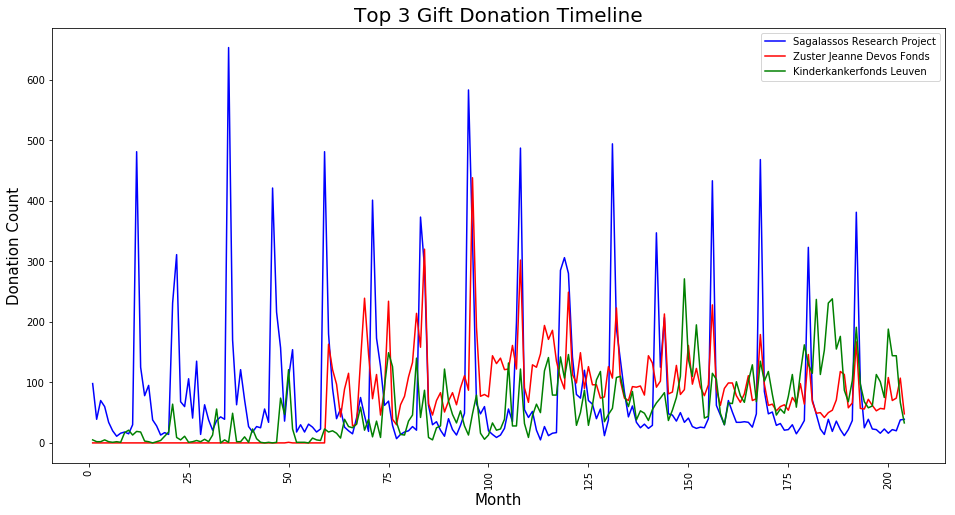

In [38]:
fig = plt.figure(figsize = (16,8))
plt.plot(gift_time_line_data_topn['ZLUF_DOCDATE_M_N'], gift_time_line_data_topn['DON_COUNT_G1'], color='blue', label='Sagalassos Research Project')
plt.plot(gift_time_line_data_topn['ZLUF_DOCDATE_M_N'], gift_time_line_data_topn['DON_COUNT_G2'], color='red', label='Zuster Jeanne Devos Fonds')
plt.plot(gift_time_line_data_topn['ZLUF_DOCDATE_M_N'], gift_time_line_data_topn['DON_COUNT_G3'], color='green', label='Kinderkankerfonds Leuven')
plt.legend()
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Donation Count', fontsize = 15)
plt.xticks(rotation=90)
plt.title('Top 3 Gift Donation Timeline', fontsize = 20)
plt.show()

<b>Periodicity/ Seasonality</b> seems to be the key property of a top donated credit. <br>
<i>Sagalassos Research Project</i> received majority of it's Multi-donors during the years 2002 - 2004. It seems most of these donors continued to donate periodically. 

In [39]:
srp = gift_time_line_data[gift_time_line_data['CREDIT_DESCRIPTION']=='Sagalassos Research Project']
srp['ZLUF_DOCDATE_M'].value_counts()

12    4655
11    4129
10    1721
1     1469
3     1093
2      985
9      668
4      641
5      512
8      504
6      441
7      424
Name: ZLUF_DOCDATE_M, dtype: int64

In [43]:
zjdf = gift_time_line_data[gift_time_line_data['CREDIT_DESCRIPTION']=='Zuster Jeanne Devos Fonds']
zjdf['ZLUF_DOCDATE_M'].value_counts()

12    2789
9     1379
10    1336
8     1336
3     1179
11    1144
1     1121
6     1088
5     1055
7     1022
4      931
2      862
Name: ZLUF_DOCDATE_M, dtype: int64

In [44]:
kfl = gift_time_line_data[gift_time_line_data['CREDIT_DESCRIPTION']=='Kinderkankerfonds Leuven']
kfl['ZLUF_DOCDATE_M'].value_counts()

12    1405
8     1223
5     1103
10    1026
9     1013
6     1005
7      930
2      903
4      887
1      885
11     818
3      740
Name: ZLUF_DOCDATE_M, dtype: int64

In [50]:
main_data_for_gift['CREDIT_DESCRIPTION'].value_counts()[:30]

Sagalassos Research Project               17242
Zuster Jeanne Devos Fonds                 15242
Kinderkankerfonds Leuven                  11938
Bibliotheekfonds                           4915
Fonds Sofhea Cruh                          4533
Fonds Een hart voor ALS                    3753
Rondoufonds voor Duchenneonderzoek         2823
Bone4Kids Fonds                            2803
SOLFA Fonds                                2772
Leuvens kankerinstituut                    2434
Fonds Kiwanis Club Leuven                  2332
Fonds Universitaire Parochie               2197
KADOC                                      1700
Fonds voor innovatief kankeronderzoek      1490
Academische Stichting Leuven               1463
Fonds Roger Dillemans                      1432
Onderzoek naar kanker bij zwangerschap     1401
Post voor Compostela                       1377
Initiatieven Theologie en Religie          1294
Mecenaatsfonds Wijsbegeerte                1278
Fonds Tom Debackere                     